In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('.\\documents\\diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [6]:
# Nuestras columnas que son vitales para este analisis
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 
                'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
# Obtener los valores de 'x' e 'y'
x = dataset[feature_cols]
y = dataset.Outcome

In [7]:
# Obtener los valores de entrenamiento y de prueba para 'x' e 'y'
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,
                                                   random_state=0)

In [9]:
# Creacion de nueestro modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

A:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Mostramos la prediccion que nos da el modelo
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# Matriz de Confusion
Los modelos de clasificación son capaces de predecir cuál es la etiqueta correspondiente a cada ejemplo o instancia basado en aquello que ha aprendido del conjunto de datos de entrenamiento. Estos modelos necesitan ser evaluados de alguna manera y posteriormente comparar los resultados obtenidos con aquellos que fueron entrenados.

Una manera de hacerlo es mediante la matriz de confusión la cual nos permite evaluar el desempeño de un algoritmo de clasificación a partir del conteo de los aciertos y errores en cada una de las clases del algoritmo.

Como su nombre lo dice tenemos una matriz que nos ayuda a evaluar la predicción mediante positivos y negativos como se muestra en la figura.

![Texto alternativo](./documents/Prediccion.jpg)

**Los verdaderos positivos (VP)** son aquellos que fueron clasificados correctamente como positivos como el modelo.

**Los verdaderos negativos (VN)** corresponden a la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.

**Los falsos negativos (FN)** es la cantidad de positivos que fueron clasificados incorrectamente como negativos.

**Los falsos positivos (FP)** indican la cantidad de negativos que fueron clasificados incorrectamente como negativos.


In [12]:
# Matriz de confusion
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

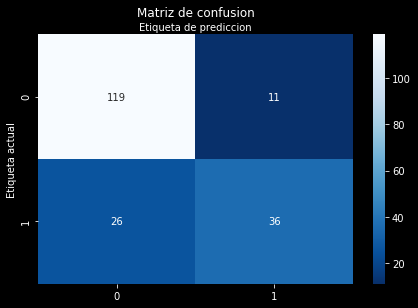

In [17]:
# Mostrar de manera visual la matriz de confusion
import numpy as np

plt.style.use('dark_background')
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [19]:
print('Exactitud: ', metrics.accuracy_score(Y_test, y_pred)*100)

Exactitud:  80.72916666666666
